<a href="https://colab.research.google.com/github/shajarian/CNN-Image-Classification/blob/main/CNN_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author: Shaghayegh (Shirley) Shajarian

**CNN Image Classification:**
Apply CNN in Google Colab for multiclass classification of brain images.
ShowAccuracy, confusion matrix, Roc, and loss curve.
Datasets Link:
https://www.kaggle.com/datasets/tourist55/alzheimers-dataset-4-class-ofimages


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/Semester 3/Big Data/HW3"

1.png  2.png  3.png  4.png  5.png  6.png  7.png  Alzheimer.zip	Assignment-3.pdf


In [ ]:
!unzip -o "/content/drive/My Drive/Semester 3/Big Data/HW3/Alzheimer.zip" -d "/content/dataset"

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/Alzheimer_s Dataset/train/MildDemented/mildDem207.jpg  
  inflating: /content/dataset/Alzheimer_s Dataset/train/MildDemented/mildDem208.jpg  
  inflating: /content/dataset/Alzheimer_s Dataset/train/MildDemented/mildDem209.jpg  
  inflating: /content/dataset/Alzheimer_s Dataset/train/MildDemented/mildDem21.jpg  
  inflating: /content/dataset/Alzheimer_s Dataset/train/MildDemented/mildDem210.jpg  
  inflating: /content/dataset/Alzheimer_s Dataset/train/MildDemented/mildDem211.jpg  
  inflating: /content/dataset/Alzheimer_s Dataset/train/MildDemented/mildDem212.jpg  
  inflating: /content/dataset/Alzheimer_s Dataset/train/MildDemented/mildDem213.jpg  
  inflating: /content/dataset/Alzheimer_s Dataset/train/MildDemented/mildDem214.jpg  
  inflating: /content/dataset/Alzheimer_s Dataset/train/MildDemented/mildDem215.jpg  
  inflating: /content/dataset/Alzheimer_s Dataset/train/MildDemented/mildDem216.jpg  
  in

Pre-process the Data

In [ ]:
!pip install tensorflow
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
for dirpath, dirnames, filenames in os.walk('/content/dataset'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 1 directories and 0 images in '/content/dataset'.
There are 2 directories and 0 images in '/content/dataset/Alzheimer_s Dataset'.
There are 4 directories and 0 images in '/content/dataset/Alzheimer_s Dataset/train'.
There are 0 directories and 2560 images in '/content/dataset/Alzheimer_s Dataset/train/NonDemented'.
There are 0 directories and 52 images in '/content/dataset/Alzheimer_s Dataset/train/ModerateDemented'.
There are 0 directories and 1792 images in '/content/dataset/Alzheimer_s Dataset/train/VeryMildDemented'.
There are 0 directories and 717 images in '/content/dataset/Alzheimer_s Dataset/train/MildDemented'.
There are 4 directories and 0 images in '/content/dataset/Alzheimer_s Dataset/test'.
There are 0 directories and 640 images in '/content/dataset/Alzheimer_s Dataset/test/NonDemented'.
There are 0 directories and 12 images in '/content/dataset/Alzheimer_s Dataset/test/ModerateDemented'.
There are 0 directories and 448 images in '/content/dataset/Alzheimer_s Dat

In [ ]:
# Set the path to the dataset
train_dir = '/content/dataset/Alzheimer_s Dataset/train'

For CNNs, we need to ensure all input images are of the same size and scale. This makes training more efficient and is necessary for the model to learn from the data effectively. Here’s what we'll do:
*   Rescale the pixel values: This normalizes the pixel values of the images from a range of 0-255 to 0-1, which helps in speeding up the training.
*   Resize the images: Ensuring all images are of the same size is crucial for training the CNN.
For this purpose we use ImageDataGenerator. These generators will automatically handle image resizing and normalization.

In [ ]:
# Initialize the ImageDataGenerator
train_gen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

In [ ]:
# Prepare generators to load images from directories
# "flow_from_directory" method automatically handles the loading and preprocessing of images located in specified directories
train_generator = train_gen.flow_from_directory(
    train_dir,
    target_size=(128,128),  # Resize images to 128x128
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_gen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 4355 images belonging to 4 classes.
Found 766 images belonging to 4 classes.


Build the CNN Model: For this work, I implement a basic model that starts with a convolutional layer of 32 filters of size 3x3, followed by a 2x2 max-pooling layer, which reduces the spatial dimensions by half. This is followed by more convolutional layers and pooling layers to further process and reduce the dimensions of the feature maps. Finally, the Flatten layer converts the 2D feature maps into a 1D vector, and Dense layers further process these features to make classification decisions.

P.S. As it takes too long, I remove one layer and I also add dropout layers.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

model = Sequential([
    Conv2D(32,(3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),
    Dropout(0.25),
    Conv2D(64,(3, 3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),
    # Conv2D(128,(3, 3), activation='relu'),
    # MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(4, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 30, 30, 64)       

Compile the Model:
This setup uses Adam as the optimizer, categorical crossentropy as the loss function (suitable for multi-class classification problems), and tracks accuracy during training and testing.

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['accuracy']  # Metrics to monitor
)

Train the Model

In [ ]:
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator
)

Epoch 1/5
137/137 [==============================] - 167s 1s/step - loss: 0.2424 - accuracy: 0.9042 - val_loss: 0.7038 - val_accuracy: 0.6984
Epoch 2/5
137/137 [==============================] - 165s 1s/step - loss: 0.1670 - accuracy: 0.9348 - val_loss: 0.6460 - val_accuracy: 0.7428
Epoch 3/5
137/137 [==============================] - 161s 1s/step - loss: 0.1301 - accuracy: 0.9513 - val_loss: 0.4715 - val_accuracy: 0.8159
Epoch 4/5
137/137 [==============================] - 166s 1s/step - loss: 0.1065 - accuracy: 0.9598 - val_loss: 0.3757 - val_accuracy: 0.8473
Epoch 5/5
137/137 [==============================] - 165s 1s/step - loss: 0.0755 - accuracy: 0.9718 - val_loss: 0.3310 - val_accuracy: 0.8616


We will save the model in case we need it for later.

In [ ]:
model.save('/content/drive/My Drive/AlzheimerCNN.h5')

# For loading:
# from tensorflow.keras.models import load_model
# model = load_model('/content/drive/My Drive/AlzheimerCNN.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Evaluate the Model

In [ ]:
# Path to the test data
test_dir = '/content/dataset/Alzheimer_s Dataset/test'
test_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_gen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)

Found 1279 images belonging to 4 classes.
40/40 [==============================] - 14s 334ms/step - loss: 1.4309 - accuracy: 0.5981
Test Accuracy: 0.5981235504150391


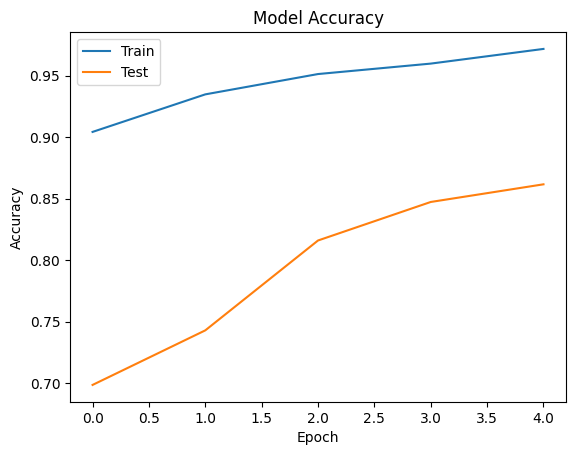

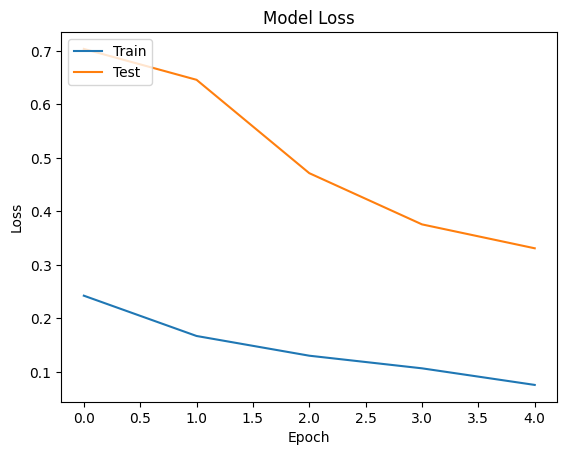

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

40/40 [==============================] - 12s 297ms/step


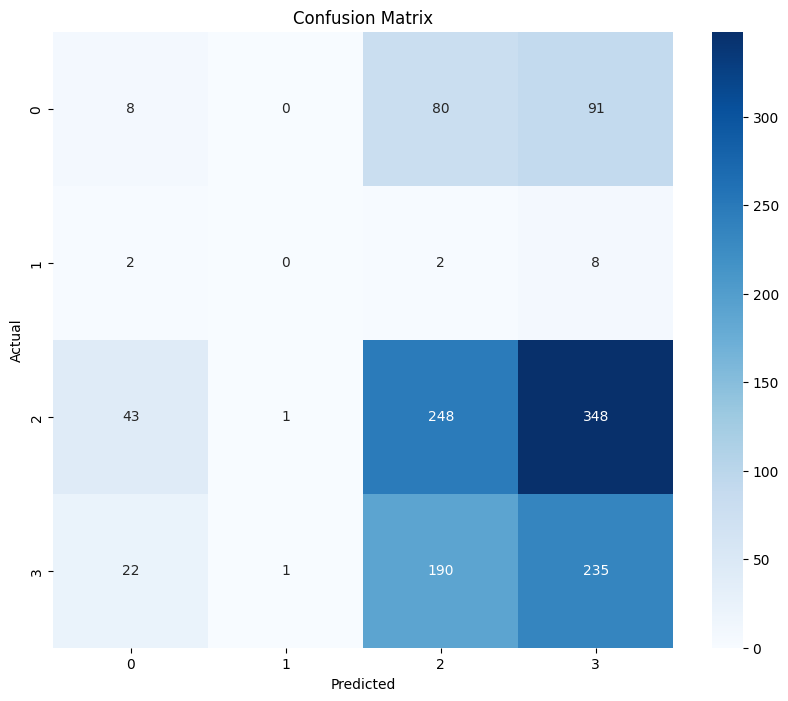

In [ ]:
# confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict classes with test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# True classes
true_classes = test_generator.classes

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

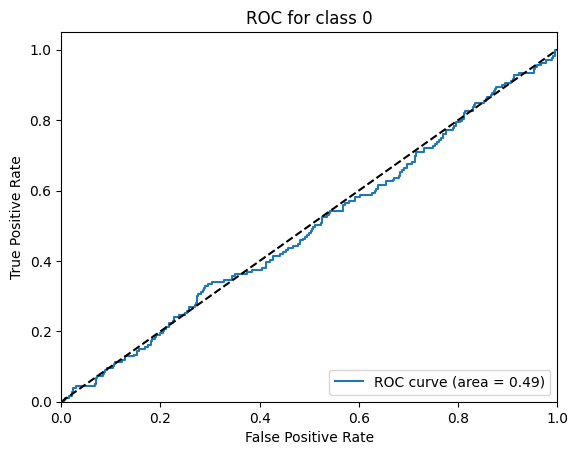

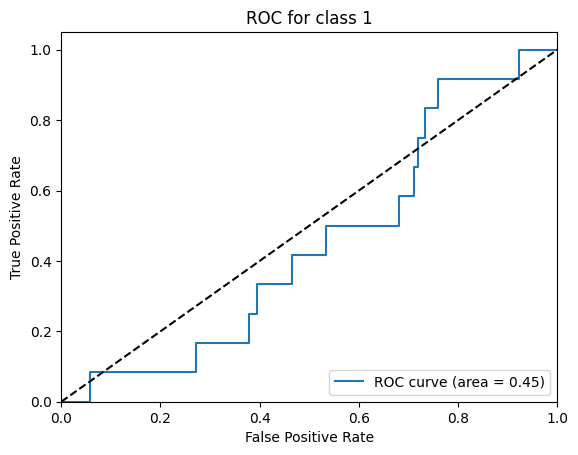

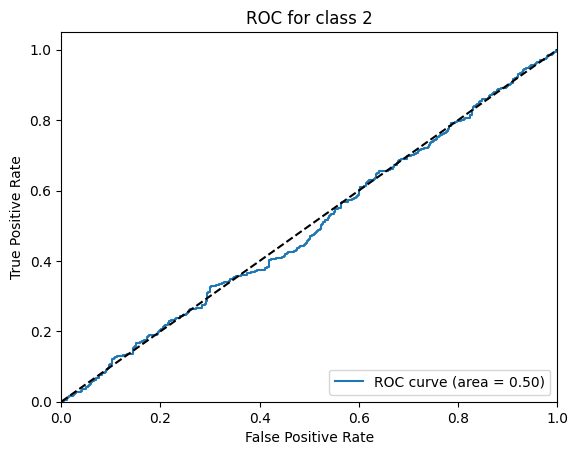

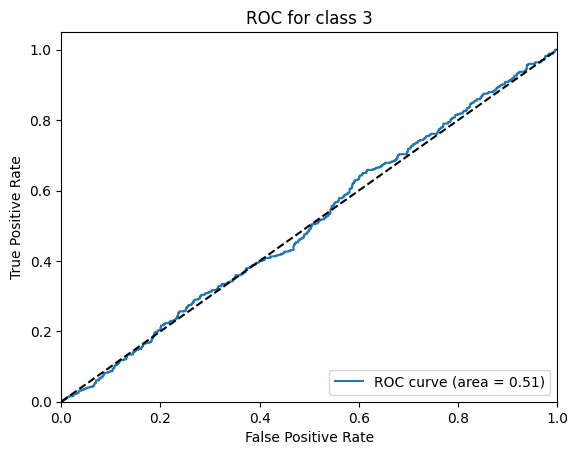

In [ ]:
#ROC Curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels
y_bin = label_binarize(true_classes, classes=[0, 1, 2, 3])
n_classes = y_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for class {}'.format(i))
    plt.legend(loc="lower right")
    plt.show()